<a href="https://colab.research.google.com/github/myndaaa/Linear-Regression-using-AutoMPG-dataset/blob/main/AUTO_MPG_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset used for this --> [Auto MPG Dataset](https://archive.ics.uci.edu/dataset/9/auto+mpg)

In [19]:
# seaborn library helps create graphs and visualizations for data analysis.
!pip install -q seaborn  # -q means less output


In [20]:
# import
import matplotlib.pyplot as plt  #  make different types of graphs and charts.
import numpy as np               # for working with numbers and doing math quickly.
import pandas as pd              # tables of data, like a spreadsheet.
import seaborn as sns            # depends on Matplotlib to create more informative graphs.

# show fewer decimal places.
np.set_printoptions(precision=3, suppress=True)  # 3 decimal places || don't use scientific notation.


In [21]:
import tensorflow as tf

from tensorflow import keras # keras helps to build models
from tensorflow.keras import layers # use layers to create different parts of our model.

print(tf.__version__) # tf --version

2.17.0


In [22]:
# auto mpg dataset is locqtion
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

# create a list of names for the columns in our dataset.
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']  # names of the data we will be using.

# load dataset from URL into a DataFrame called raw_dataset.
raw_dataset = pd.read_csv(url, names=column_names,  # read the data from the URL and assign column names.
                          na_values='?',         # replace '?' with NaN to indicate missing data.
                          comment='\t',          # ignore any text after a tab character in the dataset.
                          sep=' ',               # use space as the separator between values.
                          skipinitialspace=True) # ignore extra spaces at the beginning of each value.


In [23]:
dataset = raw_dataset.copy()  # copy to dataset
dataset.tail()  # last 5 rows of the dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


# Cleaning the data

In [24]:
# check how many unknown values (NaN) are in each column of the dataset.
dataset.isna().sum()  # counts and shows the number of missing values in each column.


,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [25]:
# remove rows with missing values
dataset = dataset.dropna()  # deletes any rows that have missing information.

# One hot encoding non numerical data type column "Origin"


---
One-hot encoding is a way to convert categorical data (like labels or names) into a numerical format that machine learning models can understand


---

Why Use One-Hot Encoding?
Avoids Misinterpretation: If we just used numbers (like 0, 1, 2), the model might think "Europe" is less than "Japan," which isn't true. One-hot encoding helps avoid this problem.


In [26]:
# map the numeric values in the 'Origin' column back to their categorical names.
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

# One-hot encode the 'Origin' column to convert categorical data into numerical format.
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='', dtype=float)

# Display the last few rows of the updated dataset to check the changes.
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0.0,0.0,1.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1.0,0.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0.0,0.0,1.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,0.0,0.0,1.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,0.0,0.0,1.0


# Split the data into training and test sets

In [27]:
# Randomly select 80% of the dataset for training.
train_dataset = dataset.sample(frac=0.8, random_state=0)


# Create a test dataset with the remaining 20% of the data.
test_dataset = dataset.drop(train_dataset.index)


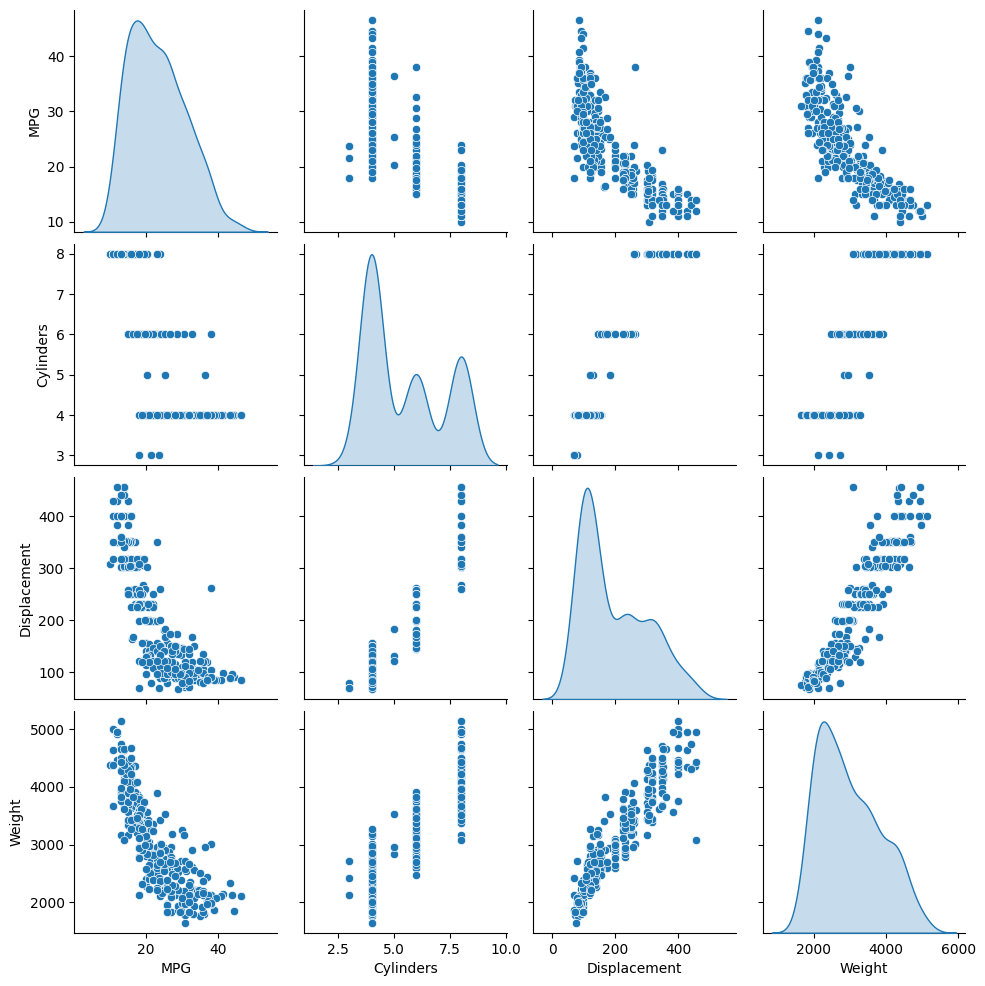

In [28]:
# Create a pairplot to visualize the relationships between selected features in the training dataset.
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')
# This will show scatter plots for each pair of the selected features and a kernel density estimate (KDE) plot on the diagonal.


In [29]:
# Get summary statistics for each column in the training dataset.
train_dataset.describe().transpose()
# This will show important information like count, mean, standard deviation, min, max, and quartiles for each feature.


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


# Split feature from label

In [30]:
# Create copies of the training and test datasets for features.
train_features = train_dataset.copy()  # This makes a copy of the training dataset to hold the feature data.
test_features = test_dataset.copy()    # This makes a copy of the test dataset to hold the feature data.

# Separate the target value (label) from the features in the training dataset.
train_labels = train_features.pop('MPG')  # This removes the 'MPG' column from train_features and stores it in train_labels.
test_labels = test_features.pop('MPG')    # This removes the 'MPG' column from test_features and stores it in test_labels.


# Normalization

In [31]:
# Get the mean and standard deviation of each feature in the training dataset.
train_dataset.describe().transpose()[['mean', 'std']]
# This shows a table with the average (mean) and spread (standard deviation) of each feature.


,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


create normalization layer

In [32]:
# Create a normalization layer that will normalize input features independently.
normalizer = tf.keras.layers.Normalization(axis=-1)
# 'axis=-1' means normalization will be applied to the last axis (the features in this case).


fit normalization layer to data

In [33]:
# Fit the normalization layer to the training data by calculating the mean and variance.
normalizer.adapt(np.array(train_features))
# This calculates the mean and variance of the training data and stores it inside the normalization layer.


In [34]:
# Display the mean of the training features that the normalizer has learned.
print(normalizer.mean.numpy())
# This prints out the mean values of each feature, which the normalizer learned from the training data.


[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [35]:
# Take the first example from the training features.
first = np.array(train_features[:1])  # This grabs the first row from the training data.

# Use np.printoptions to control the formatting of the printed output.
with np.printoptions(precision=2, suppress=True):
    # Print the raw (unnormalized) first example.
    print('First example:', first)
    print()

    # Apply the normalization to the first example and print the normalized output.
    print('Normalized:', normalizer(first).numpy())


First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


#Linear Regression


In [36]:
# Convert the 'Horsepower' column from train_features into a NumPy array.
horsepower = np.array(train_features['Horsepower'])

# Create a Normalization layer to normalize the 'Horsepower' input.
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)

# Fit the normalization layer to the horsepower data.
horsepower_normalizer.adapt(horsepower)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
# Build a Keras Sequential model.
horsepower_model = tf.keras.Sequential([
    # Step 1: Add the horsepower normalizer.
    horsepower_normalizer,  # This layer normalizes the 'Horsepower' input.

    # Step 2: Add a Dense layer.
    layers.Dense(units=1)  # This is a single neuron layer (y = mx + b) that predicts 1 output (MPG).
])

# Display the summary of the model architecture.
horsepower_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [38]:
horsepower_model.predict(horsepower[:10])
# making predictions with untrained model

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


array([[-1.021],
       [-0.577],
       [ 1.884],
       [-1.431],
       [-1.294],
       [-0.508],
       [-1.534],
       [-1.294],
       [-0.337],
       [-0.577]], dtype=float32)

In [39]:
# compiling the model
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)


In [40]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],  # Input: the 'Horsepower' feature from the training data.
    train_labels,  # Output: the 'MPG' labels (the target to predict).
    epochs=100,  # Train for 100 full passes over the dataset.
    verbose=0,  # Suppress detailed logging; training progress will not be displayed.
    validation_split=0.2  # Use 20% of the training data for validation.
)


CPU times: user 6.82 s, sys: 253 ms, total: 7.07 s
Wall time: 9.37 s


In [41]:
# Convert the training history to a DataFrame for easy analysis.
hist = pd.DataFrame(history.history)

# Add the epoch number as a column to the DataFrame.
hist['epoch'] = history.epoch

# Display the last few rows of the DataFrame to see how training progressed in the final epochs.
hist.tail()


,loss,val_loss,epoch
95,3.803629,4.183641,95
96,3.802523,4.195948,96
97,3.803455,4.196922,97
98,3.804149,4.179592,98
99,3.805512,4.195029,99


In [42]:
def plot_loss(history):
    # Plot the training loss.
    plt.plot(history.history['loss'], label='loss')

    # Plot the validation loss.
    plt.plot(history.history['val_loss'], label='val_loss')

    # Set the y-axis limits between 0 and 10 for better visualization.
    plt.ylim([0, 10])

    # Label the x-axis as 'Epoch' to represent the training progress over time.
    plt.xlabel('Epoch')

    # Label the y-axis as 'Error [MPG]' to show the error in terms of miles per gallon (MPG).
    plt.ylabel('Error [MPG]')

    # Add a legend to distinguish between the training loss and validation loss.
    plt.legend()

    # Add a grid to make the plot easier to read.
    plt.grid(True)


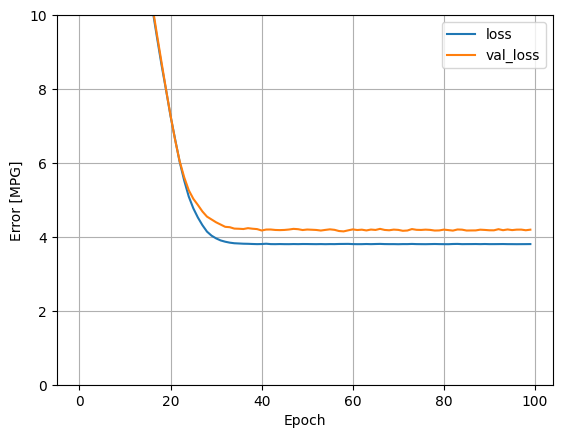

In [43]:
plot_loss(history)

In [44]:
test_results = {}  # Initialize an empty dictionary to store test results.

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],  # Use 'Horsepower' from the test data as input.
    test_labels,  # Use the true 'MPG' values from the test data as the labels (targets).
    verbose=0  # Suppress detailed output during evaluation.
)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


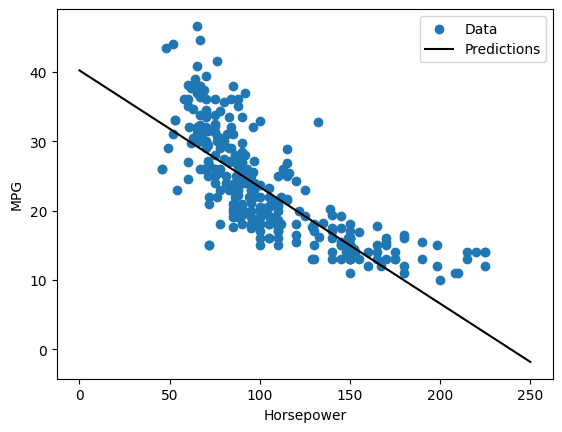

In [45]:
# Generate evenly spaced values between 0 and 250, creating 251 points (for plotting).
x = tf.linspace(0.0, 250, 251)

# Use the trained horsepower model to predict MPG for each value in x.
y = horsepower_model.predict(x)

# Define a function to plot the actual data points and the model's predictions.
def plot_horsepower(x, y):
    # Scatter plot of the actual 'Horsepower' vs 'MPG' from the training data.
    plt.scatter(train_features['Horsepower'], train_labels, label='Data')

    # Plot the model's predicted 'MPG' for the values in x.
    plt.plot(x, y, color='k', label='Predictions')  # 'k' is shorthand for black color.

    # Label the x-axis as 'Horsepower' (input feature).
    plt.xlabel('Horsepower')

    # Label the y-axis as 'MPG' (target output).
    plt.ylabel('MPG')

    # Add a legend to distinguish between the actual data and predictions.
    plt.legend()

# Call the function to create the plot.
plot_horsepower(x, y)
